<a href="https://colab.research.google.com/github/Jmckone1/unet/blob/main/Run_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Jan 2021 code/UNet_3

/content/drive/MyDrive/Jan 2021 code/UNet_3


Training loss: 11.81714
Training loss: 11.85848
Training loss: 11.30590
Training loss: 10.51147
Training loss: 9.72585
Training loss: 9.37806
Epoch 0: Step 5: U-Net loss: 0.5861290097236633


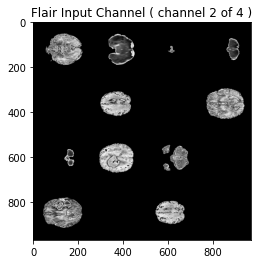

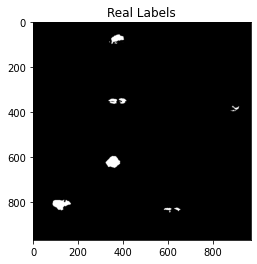

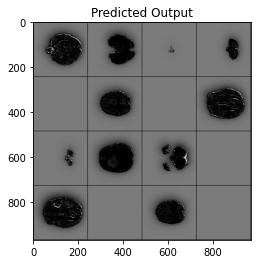

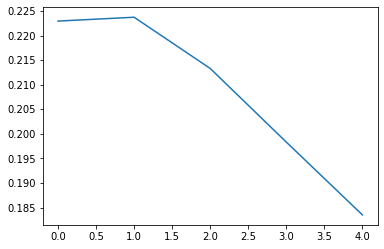

Training loss: 7.44975
Training loss: 9.75327
Training loss: 6.51628
Training loss: 7.39775
Training loss: 7.38371
Epoch 0: Step 10: U-Net loss: 0.46148180961608887


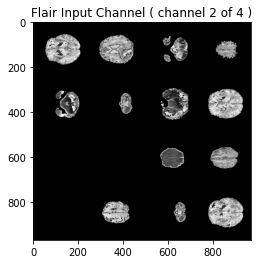

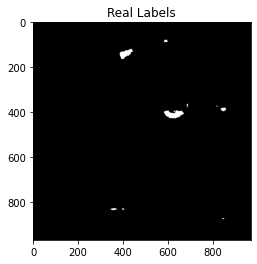

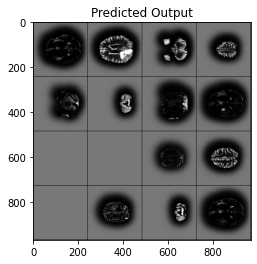

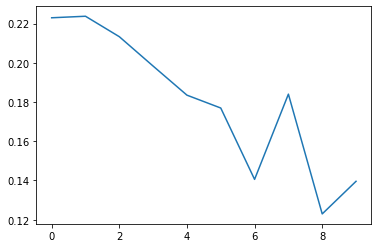

Training loss: 7.28205
Training loss: 6.39421
Training loss: 4.94414
Training loss: 6.35411
Training loss: 3.14570
Epoch 0: Step 15: U-Net loss: 0.19660605490207672


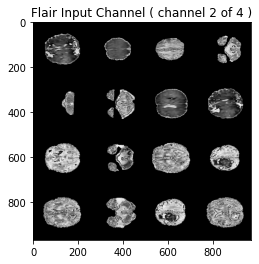

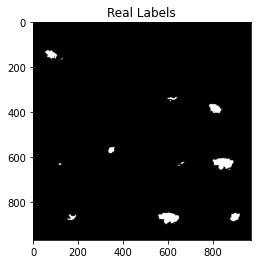

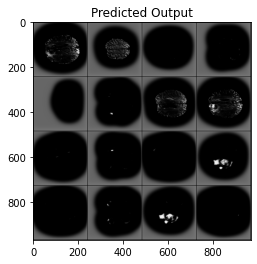

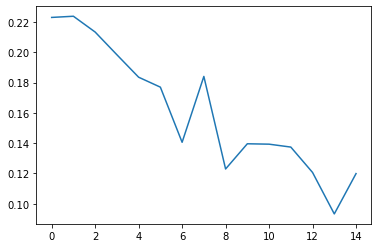

Training loss: 3.94619
Training loss: 7.78258
Training loss: 6.81829
Training loss: 5.73582
Training loss: 5.96497
Epoch 0: Step 20: U-Net loss: 0.3728104829788208


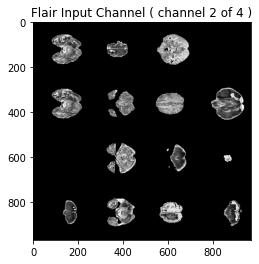

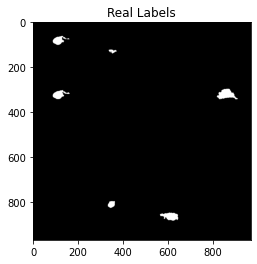

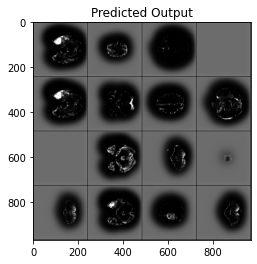

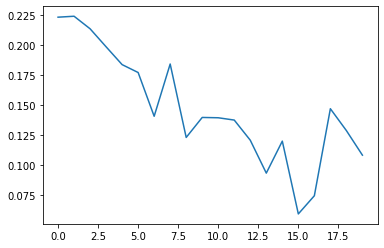

Training loss: 7.00349
Training loss: 7.54518
Training loss: 6.50965
Training loss: 6.66972
Training loss: 5.04039
Epoch 0: Step 25: U-Net loss: 0.3150246739387512


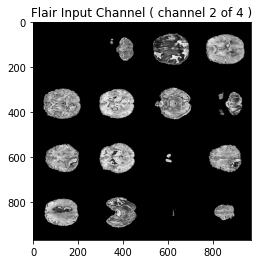

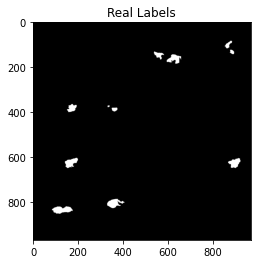

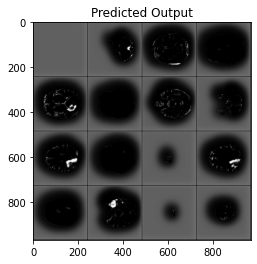

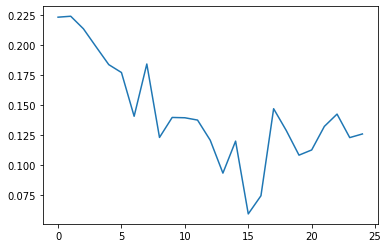

Training loss: 3.96715
Training loss: 2.74192
Training loss: 1.41839
Training loss: 2.09002
Training loss: 1.89459
Epoch 0: Step 30: U-Net loss: 0.11841197311878204


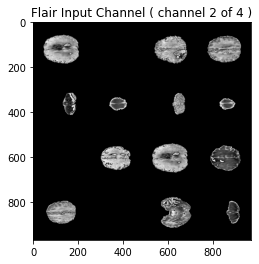

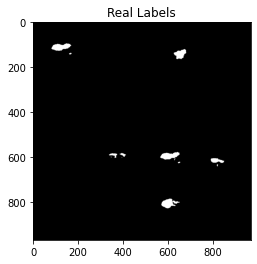

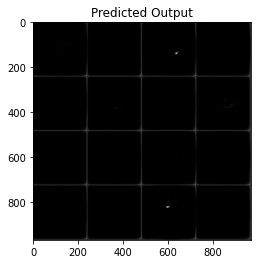

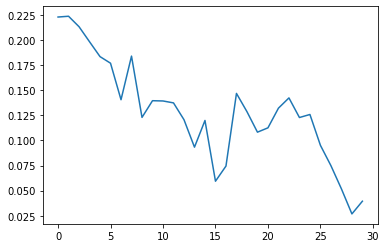

Training loss: 0.37750
Training loss: 1.48502
Training loss: 0.81438
Training loss: 0.79463
Training loss: 1.05305
Epoch 0: Step 35: U-Net loss: 0.06581567972898483


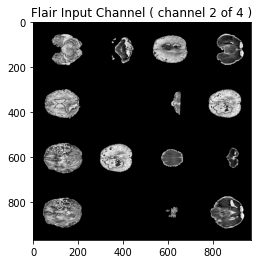

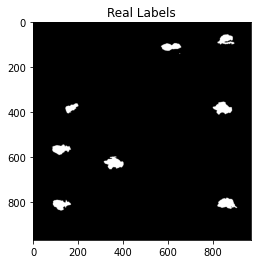

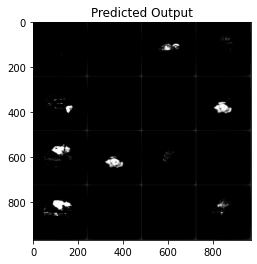

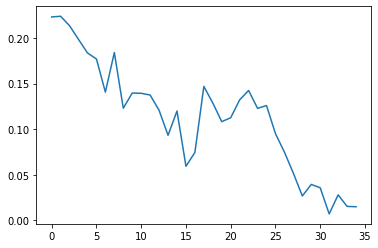

Training loss: 0.83492
Training loss: 1.18911
Training loss: 0.54970
Training loss: 0.43887
Training loss: 0.65668
Epoch 0: Step 40: U-Net loss: 0.0410427451133728


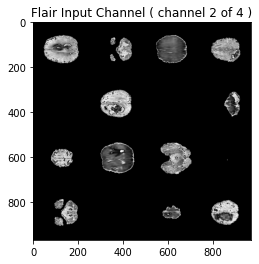

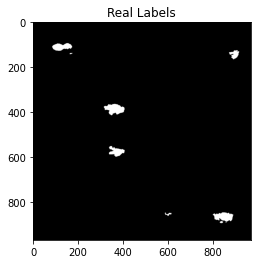

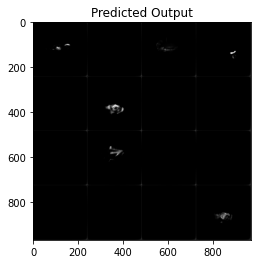

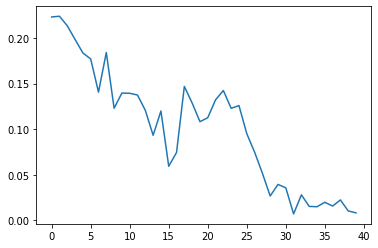

Training loss: 0.38904
Training loss: 0.62680
Training loss: 0.51520
Training loss: 0.65051
Training loss: 0.41733
Epoch 0: Step 45: U-Net loss: 0.026083044707775116


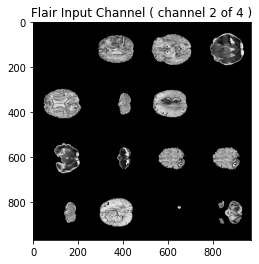

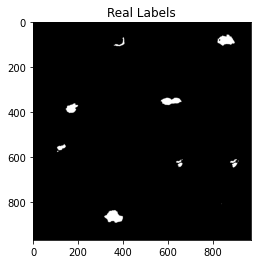

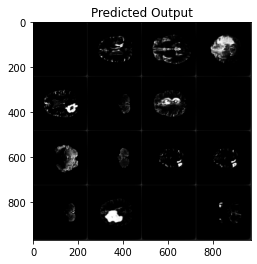

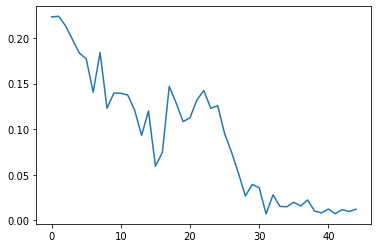

Training loss: 0.45265
Training loss: 0.54283
Training loss: 0.51837
Training loss: 0.43646
Training loss: 0.17765
Epoch 0: Step 50: U-Net loss: 0.011103009805083275


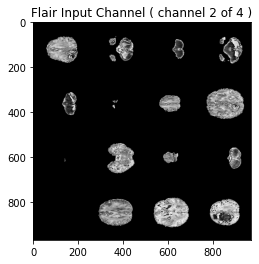

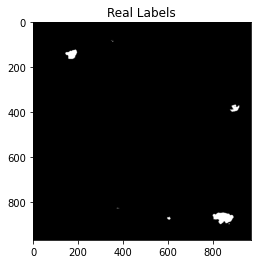

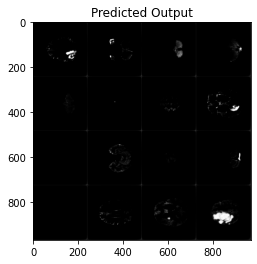

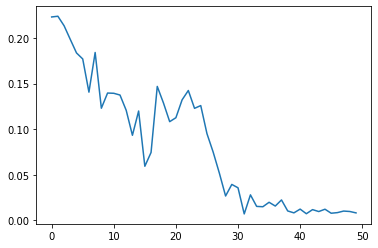

Training loss: 0.22388
Training loss: 0.08902



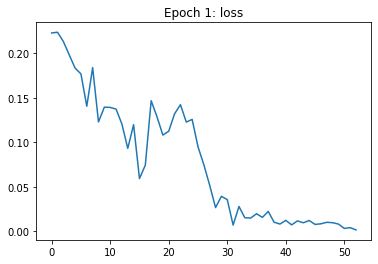

Validation...


UnboundLocalError: ignored

In [8]:
%run "/content/drive/MyDrive/Jan 2021 code/UNet_3/UNet.py"

[[0.1841944748500608, 0.19090253002238725, 0.18575648541720408, 0.19039373577765697, 0.17591229924615823, 0.19263935089111328, 0.168602151690789, 0.14703982731081405, 0.16303505087798498, 0.12581218863433263, 0.12967951792591023, 0.11273294124963149, 0.11547706711967036, 0.11637863123191977, 0.1403536616631274, 0.13927506500819944, 0.10030818435381043, 0.11665700516610775, 0.10968456628187648, 0.09302647608631062, 0.09105872208217405, 0.1165985791188366, 0.06786271761048515, 0.06963490090280208, 0.0454568143160838, 0.0452335960460159, 0.03102436830412667, 0.021530650696664485, 0.028502077426550525, 0.01546994132815667, 0.027216515451107384, 0.014414900878690323, 0.015526962730119814, 0.010873430180099775, 0.015881629485004354, 0.006480087086839496, 0.015460622760484804, 0.008550240746084249, 0.007826942880198641, 0.011475154813730492, 0.008525164622180868, 0.012273305991910538, 0.006539993690994551, 0.008861355061800975, 0.009983060494908746, 0.01221797488770395, 0.007048142968483691, 

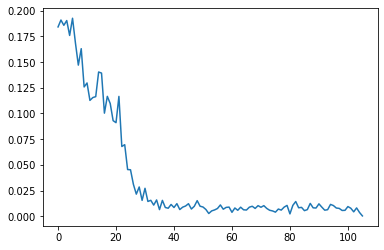

In [ ]:
print(Train_loss)
print(len(Train_loss))
list1 = loss[0]
list1.extend(loss[1])
plt.plot(list1)
plt.show()

In [ ]:
%run "/content/drive/MyDrive/Jan 2021 code/UNet_3/Brats_dataloader.py"
print(y)
print(y.dtype)
print(np.unique(y))
import matplotlib.pyplot as plt
plt.imshow(y)
plt.show()

In [ ]:
import logging
from torch.utils.data.dataset import Dataset
from os import walk
import os
import nibabel as nib
import numpy as np
import torch
import torchvision.transforms as transforms

path = "HGG"
index = 75
filetype = ["t1","flair","t1ce","t2","seg"]
img_data = np.empty((4,240,240,155))
img_labels = np.empty((240,240,155))
label_val = 0
save_lbl = True
file_output_name="whseg"
f = []
d = []
for (dir_path, dir_names, file_names) in walk(path):
    f.extend(file_names)
    d.extend(dir_names)
    for name in dir_names:
      print(os.path.join(path, name))
      file_label = name + '/' + name + r"_" + filetype[4] + '.nii.gz'
      l_full_path = os.path.join(path, file_label)
      l_img = nib.load(l_full_path)
      img_labels[:,:,:] = (l_img.get_fdata())[:,:,:]
      if label_val != 0:
        img_labels = (img_labels == label_val).astype(float)
      else:
        img_labels = (~(img_labels == label_val)).astype(float)

      if save_lbl == True:
        Label_img_save = nib.Nifti1Image(img_labels, np.eye(4))
        nib.save(Label_img_save, os.path.join(path, name + '/' + name + r"_" + file_output_name  + '.nii.gz'))  

      #y = img_labels[:,:,int(index - 155*np.floor(index/155))]
      #import matplotlib.pyplot as plt
      #plt.imshow(y)
      #plt.show()
      #label = img_labels[:,:,int(index - 155*np.floor(index/155))]


HGG/Brats18_2013_7_1
HGG/Brats18_2013_5_1
HGG/Brats18_2013_4_1
HGG/Brats18_2013_3_1
HGG/Brats18_2013_2_1
HGG/Brats18_2013_10_1


In [ ]:
index = 930
y = img_labels[:,:,int(index - 155*np.floor(index/155))]
print(y)
print(y.dtype)
print(np.unique(y))
import matplotlib.pyplot as plt
plt.imshow(y)
plt.show()